<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df['Hour'] = (df['Time'] / 3600) % 24
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


In [4]:
import numpy as np
# Create cyclic features
df['Time_sin'] = np.sin((2 * np.pi * df['Hour']) / 24)
df['Time_cos'] = np.cos((2 * np.pi * df['Hour']) / 24)

# Drop the original 'Time' and 'Hour' columns
df = df.drop(columns=['Time', 'Hour'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Time_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000073,1.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000073,1.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000145,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.001018,0.999999
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.000945,1.000000
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.000873,1.000000
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.000873,1.000000


In [5]:

from sklearn.model_selection import train_test_split

# Assuming 'Class' is the column representing the target variable
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())


(227845, 31) (56962, 31) (227845,) (56962,)
Class
0    227451
1       394
Name: count, dtype: int64
Class
0    56864
1       98
Name: count, dtype: int64


In [18]:
# prompt: xgb classifier with parameters that can maximise precision , recall f1 and f2

from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, precision_recall_curve
# # Initialize the XGBoost classifier with optimized hyperparameters
# xgb_classifier = XGBClassifier(
#     n_estimators=2000,  # Adjust the number of estimators
#     max_depth=10,        # Adjust the maximum depth of trees
#     learning_rate=0.01, # Adjust the learning rate
#     scale_pos_weight = 868, # address class imbalance
#     subsample = 0.8,
#     colsample_bytree = 0.8,
#     objective = 'binary:logistic',
#     eval_metric='logloss'
#     # Add more hyperparameters as needed
# )

# # Train the classifier
# xgb_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = xgb_classifier.predict(X_test)


# Initialize the XGBoost classifier with tuned hyperparameters
xgb_classifier = XGBClassifier(
    n_estimators=1000,          # Number of trees
    learning_rate=0.01,        # Lower learning rate
    max_depth=7,               # Tree depth
    min_child_weight=3,        # Minimum sum of instance weight (Hessian) needed in a child
    subsample=0.8,             # Row sampling
    colsample_bytree=0.8,      # Feature sampling
    scale_pos_weight=4,        # Use 1 if SMOTE-balanced; otherwise, ratio of negative/positive
    reg_alpha=0.01,            # L1 regularization
    reg_lambda=0.1,            # L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Predict
y_pred = xgb_classifier.predict(X_test)

# Evaluation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"F2-score: {f2:.4f}")


y_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Find the best threshold for F1-score
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]

# Final prediction using best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Final evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precision: 0.9111
Recall: 0.8367
F1-score: 0.8723
F2-score: 0.8506
Best Threshold: 0.5652
Precision: 0.9111
Recall: 0.8367
F1-score: 0.8723
ROC-AUC: 0.9797


In [19]:
# prompt: classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



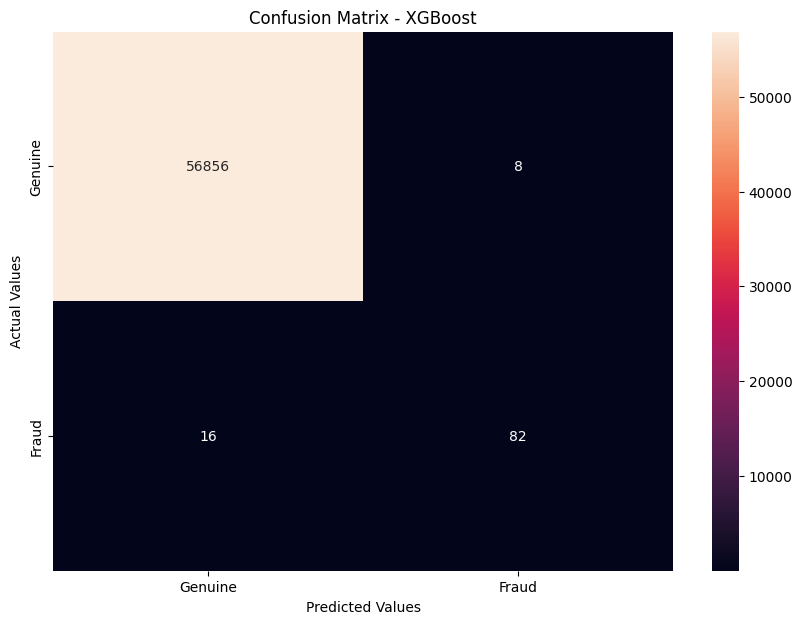

In [20]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - XGBoost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()


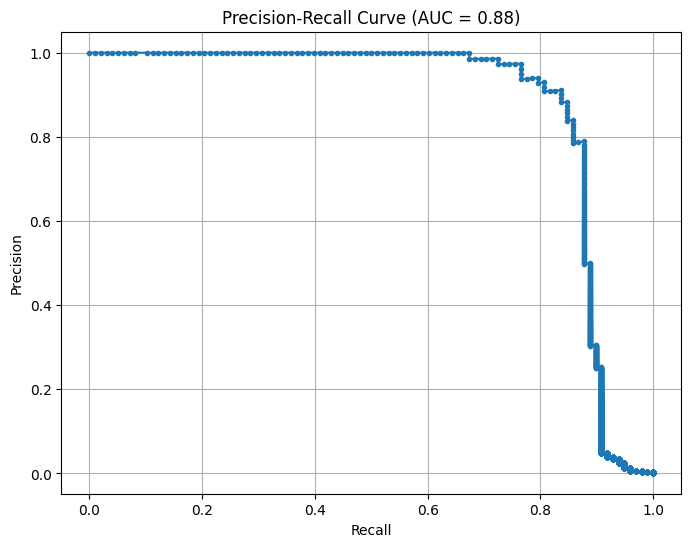

In [21]:
# prompt: precision recall curve with auc

from sklearn.metrics import precision_recall_curve, auc

# ... (your existing code) ...

# Predict probabilities instead of class labels
y_pred_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import accuracy_score


metrics1 = [['Accuracy',(accuracy_score(y_test, y_pred))],
                         ['Precision',precision_score(y_test, y_pred)],
                         ['Recall', recall_score(y_test, y_pred)],
                         ['F1_score',f1_score(y_test, y_pred)]]
metrics1_df = pd.DataFrame(metrics1, columns = ['Metrics', 'Results'])
metrics1_df


,Metrics,Results
0,Accuracy,0.999579
1,Precision,0.911111
2,Recall,0.836735
3,F1_score,0.872340


     Feature  Importance
13       V14    0.313075
9        V10    0.116414
16       V17    0.111148
11       V12    0.046094
6         V7    0.029540
10       V11    0.029170
3         V4    0.025636
15       V16    0.018439
0         V1    0.017893
12       V13    0.017400
8         V9    0.016733
17       V18    0.016376
2         V3    0.015315
27       V28    0.014992
28    Amount    0.014540
5         V6    0.014230
20       V21    0.013969
7         V8    0.013886
1         V2    0.013628
30  Time_cos    0.013116
14       V15    0.012899
25       V26    0.012806
18       V19    0.012300
19       V20    0.012294
26       V27    0.012102
21       V22    0.011866
22       V23    0.011282
4         V5    0.010969
23       V24    0.010797
24       V25    0.010747
29  Time_sin    0.010345


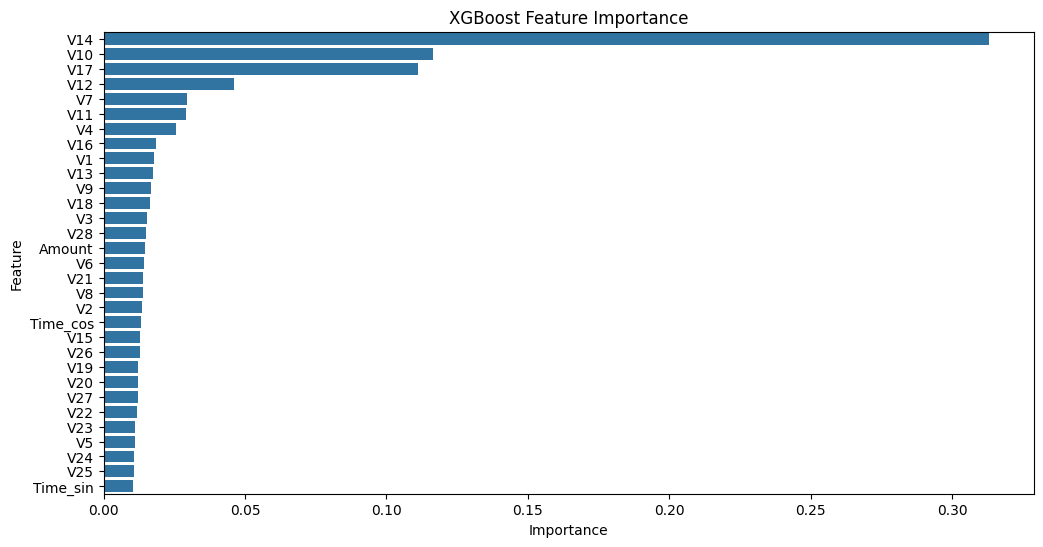

In [23]:
# prompt: feature importance

# Get feature importances from the trained XGBoost model
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


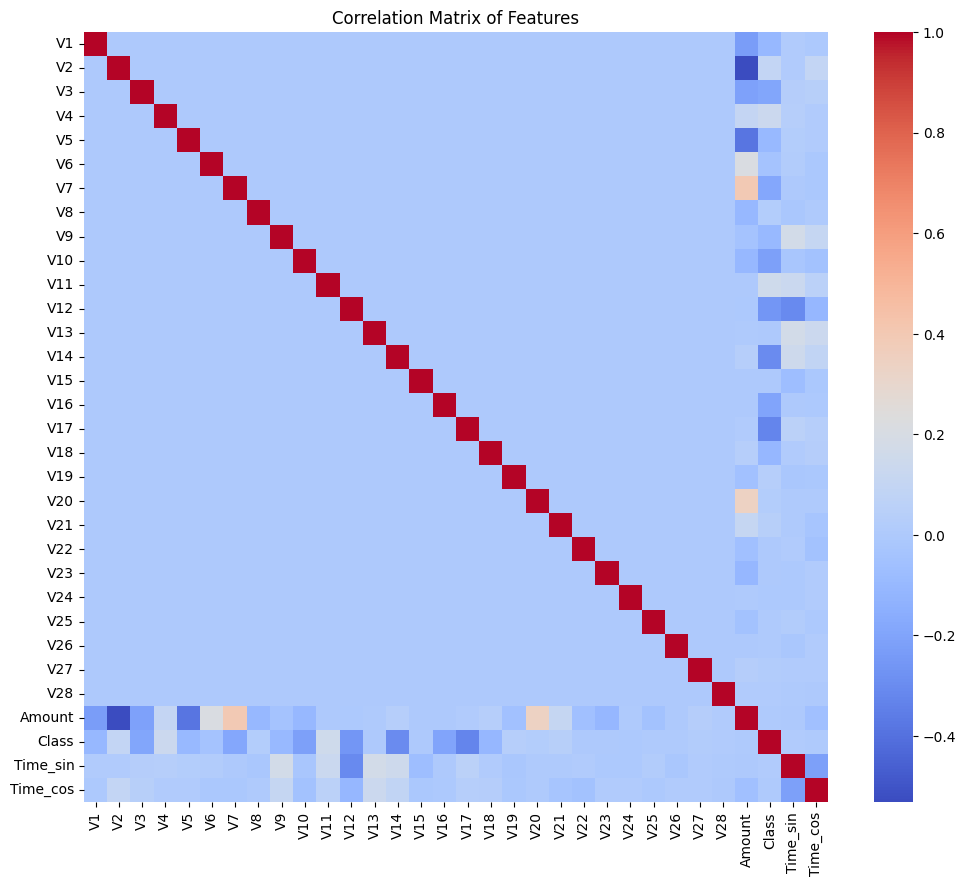

In [24]:
# prompt: correlation matrix

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [25]:
y_scores = xgb_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score
import numpy as np

thresholds = np.arange(0.0, 1.0, 0.01)
results = []

for thresh in thresholds:
    y_pred = (y_scores >= thresh).astype(int)  # Apply threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((thresh, precision, recall, f1, f2, accuracy))

# Print or analyze results
for thresh, prec, rec, f1, f2, acc in results:
    print(f"Threshold: {thresh:.2f}, Precision: {prec:.8f}, Recall: {rec:.8f}, F1: {f1:.8f}, F2:{f2:.8f}, Accuracy: {acc:.8f}")

Threshold: 0.00, Precision: 0.00172045, Recall: 1.00000000, F1: 0.00343498, F2:0.00854343, Accuracy: 0.00172045
Threshold: 0.01, Precision: 0.40465116, Recall: 0.88775510, F1: 0.55591054, F2:0.71663921, Accuracy: 0.99755978
Threshold: 0.02, Precision: 0.52439024, Recall: 0.87755102, F1: 0.65648855, F2:0.77338129, Accuracy: 0.99842000
Threshold: 0.03, Precision: 0.60992908, Recall: 0.87755102, F1: 0.71966527, F2:0.80675422, Accuracy: 0.99882378
Threshold: 0.04, Precision: 0.66666667, Recall: 0.87755102, F1: 0.75770925, F2:0.82533589, Accuracy: 0.99903444
Threshold: 0.05, Precision: 0.71666667, Recall: 0.87755102, F1: 0.78899083, F2:0.83984375, Accuracy: 0.99919244
Threshold: 0.06, Precision: 0.74137931, Recall: 0.87755102, F1: 0.80373832, F2:0.84645669, Accuracy: 0.99926267
Threshold: 0.07, Precision: 0.76785714, Recall: 0.87755102, F1: 0.81904762, F2:0.85317460, Accuracy: 0.99933289
Threshold: 0.08, Precision: 0.78899083, Recall: 0.87755102, F1: 0.83091787, F2:0.85828343, Accuracy: 0.9